In [15]:
import pandas as pd

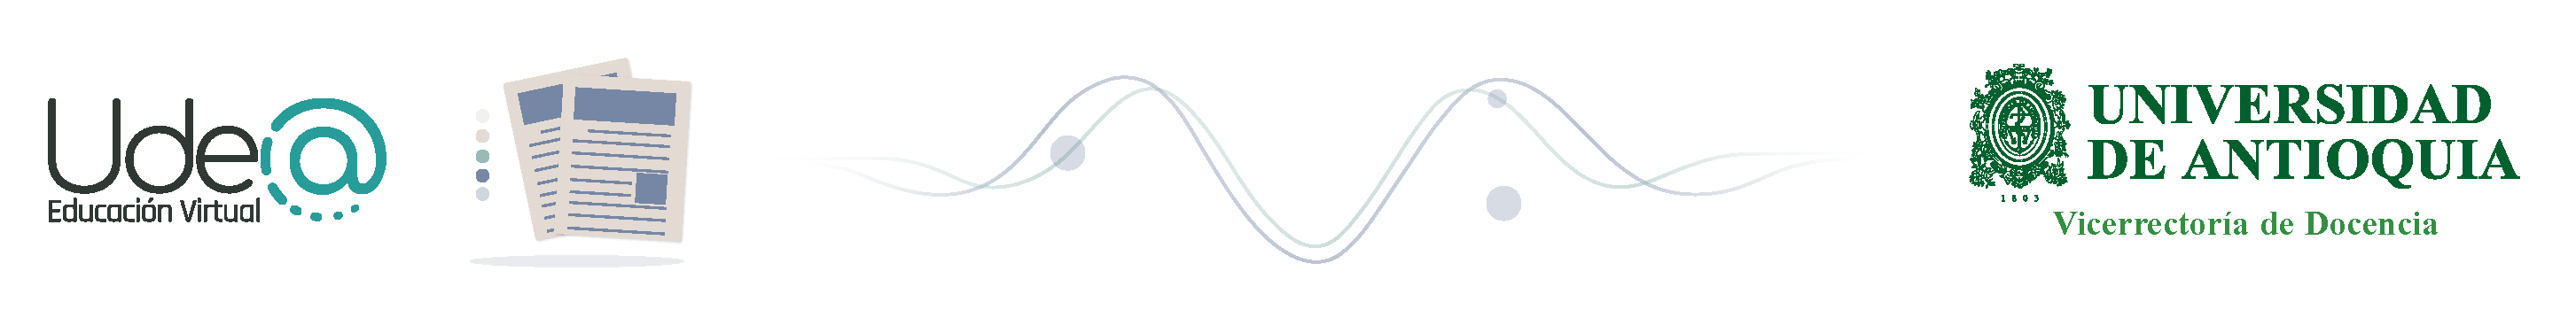

<div align="center">

#Mini-proyecto 2: Modelos de Variable Latente y Clasificadores Lineales para el Reconocimiento de Patrones

##Tratamiento de Se nales III

Daniel Felipe Munoz Restrepo

Martin Alirio Barbosa Garzon 

###Facultad de Ingenierıa

###Universidad de Antioquia

###2023-1
</div>

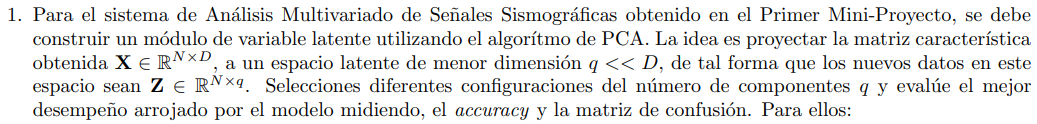

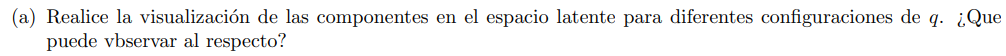

In [16]:
#Inicialmente realizamos el cargue del csv como un objeto dataframe, y lo previsualizamos

ruta_sisTele = 'https://drive.google.com/file/d/16Mul4SQnPqmGYQa9tggG5hpJAfRRX8PP/view?usp=share_link'
!gdown  "16Mul4SQnPqmGYQa9tggG5hpJAfRRX8PP" -O 'data.csv'

df = pd.read_csv('data.csv', sep = ",")
df.head()

Downloading...
From: https://drive.google.com/uc?id=16Mul4SQnPqmGYQa9tggG5hpJAfRRX8PP
To: /content/drive/MyDrive/Senales3/Mini-proyecto 2: Modelos de Variable Latente y Clasificadores Lineales para el Reconocimiento de Patrones/data.csv
100% 72.7k/72.7k [00:00<00:00, 35.4MB/s]


,Unnamed: 0,energy,max_power,max_power_freq,mean_spectrum,var_spectrum,max_spectrum,entropy,min_spectrum,no_zero_crossings,...,n5,n25,n75,n95,median,mean,std,var,rms,TipoSismo
0,0,5.310861e-02,1.419932e-02,0.390625,3.046022e-04,7.792240e-06,3.205470e-03,2.358735e-05,8.5897,150.0,...,-0.053306,-7.729353e-03,8.603073e-03,0.036545,3.591941e-04,1.179732e-03,0.054195,2.937069e-03,2.276029e-02,sisLoc
1,1,3.244844e-06,1.832449e-07,3.906250,5.284037e-06,4.242113e-10,5.961742e-05,4.607811e-07,8.5897,432.0,...,-0.000271,-9.981387e-05,9.876545e-05,0.000278,4.269650e-06,-1.405955e-06,0.000403,1.623306e-07,1.543846e-04,sisLoc
2,2,8.804790e-11,6.431583e-12,4.687500,3.225305e-08,1.080914e-14,3.264931e-07,2.796161e-09,8.5897,525.0,...,-0.000002,-5.790571e-07,5.971022e-07,0.000002,-3.080832e-09,-4.690671e-09,0.000002,4.465228e-12,8.961387e-07,sisLoc
3,3,8.978237e-02,2.309679e-02,0.195312,3.120260e-04,1.332553e-05,3.891565e-03,8.251276e-06,8.5897,111.0,...,-0.066823,-8.171886e-03,6.516919e-03,0.039791,-2.043158e-04,-4.059479e-04,0.071588,5.124898e-03,2.902386e-02,sisLoc
4,4,3.536772e-06,2.609267e-07,3.906250,3.617009e-06,5.492457e-10,5.447490e-05,7.573640e-08,8.5897,395.0,...,-0.000154,-5.767317e-05,5.347476e-05,0.000157,3.033610e-06,8.098535e-07,0.000414,1.710037e-07,1.002111e-04,sisLoc
